## Boston Regression Activity 

### Description

Practice linear regressions

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas

In [12]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

## Procedure

For this activity, you are going to validate your hypothesis about the Boston data set. You are first going to perform a regression of just a subset of the features you choose, then you are going to perform a regression with all of the features.  The steps for performing a linear regression with sciKit learn are as follows: 
 1. Load Data (Which includes both loading the full dataset and seperating the data into X and y)
 2. Split data using train_test_split()
 3. Create lr object
 4. Train the lr model
 5. Test the lr model

### Hypothesis

What is your hypothesis?

Answer: 

In [13]:
#Load dataset
raw = sk.datasets.load_boston()
boston = DataFrame(raw.data, columns=raw.feature_names)
boston['MEDV'] = raw.target
boston.head()

print(boston.head())
print(boston.describe())
print(boston.columns)

feature_columns = ['RM', 'DIS', 'CRIM', 'ZN', 'PTRATIO']
target_column = ['MEDV']
feature_columns2 = ['RM', 'DIS', 'TAX', 'CHAS', 'ZN', 'LSTAT']
target_column2 = ['MEDV']




      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

Feature: RM


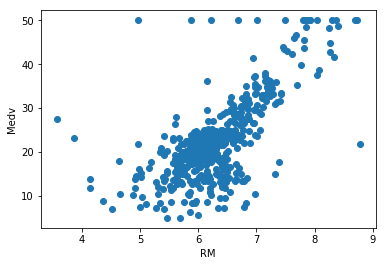

Feature: DIS


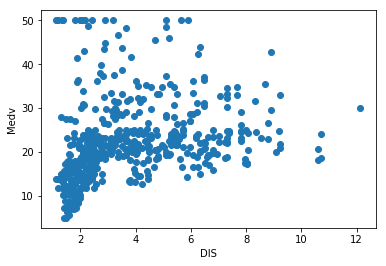

Feature: CRIM


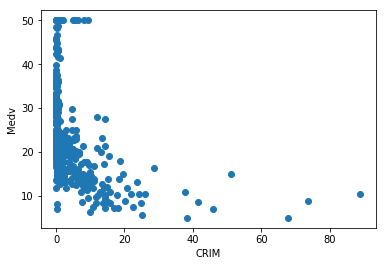

Feature: ZN


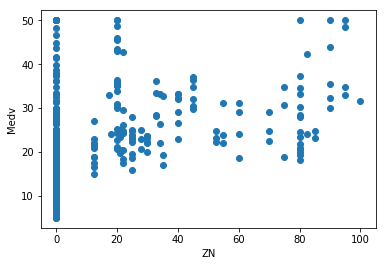

Feature: PTRATIO


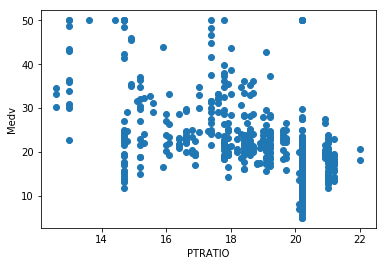

In [14]:
for element in feature_columns:
    print(f'Feature: {element}')
    y_values = boston[target_column]
    x_values = boston[element]
    plt.scatter(x_values, y_values)
    plt.xlabel(element)
    plt.ylabel("Medv")
    plt.show()
    

### Full Dataset

In [15]:
print((boston['ZN'] == 80).sum())
test_size = .2
x_data = boston[feature_columns]
y_data = boston[target_column]
x_train, x_test, y_train, y_test = train_test_split (x_data, y_data, test_size = test_size)

print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

15
x_train:  (404, 5)
x_test:  (102, 5)
y_train:  (404, 1)
y_test:  (102, 1)


In [16]:
print((boston['ZN'] == 80).sum())
test_size = .2
x_data2 = boston[feature_columns2]
y_data2 = boston[target_column2]
x_train2, x_test2, y_train2, y_test2 = train_test_split (x_data2, y_data2, test_size = test_size)

print('x_train2: ', x_train2.shape)
print('x_test2: ', x_test2.shape)
print('y_train2: ', y_train2.shape)
print('y_test2: ', y_test2.shape)

15
x_train2:  (404, 6)
x_test2:  (102, 6)
y_train2:  (404, 1)
y_test2:  (102, 1)


In [18]:
boston_model = LinearRegression()

boston_model.fit(x_train, y_train)
#train module
train_preds = boston_model.predict(x_train)
print(train_preds.shape)
test_preds = boston_model.predict(x_test)
print(test_preds.shape)

n = len(x_train)
train_mse = ((y_train-train_preds)**2).sum() / n
train_rmse = np.sqrt(train_mse)
print('Train RMSE: ',train_rmse)
print('Train MSE: ',train_mse)

n = len(x_test)
test_mse = ((y_test-test_preds)**2).sum() / n
test_rmse = np.sqrt(test_mse)
print('Test RMSE: ',test_rmse)
print('Test MSE: ',test_mse)
## test nodule

r2_train = boston_model.score(x_train,y_train)
print('R2 train: ', r2_train)


r2_test = boston_model.score(x_test,y_test)
print('R2 test: ', r2_test)






(404, 1)
(102, 1)
Train RMSE:  MEDV    5.820356
dtype: float64
Train MSE:  MEDV    33.876544
dtype: float64
Test RMSE:  MEDV    5.846259
dtype: float64
Test MSE:  MEDV    34.178742
dtype: float64
R2 train:  0.6146829379952725
R2 test:  0.5136950790873169


In [20]:
boston_model = LinearRegression()

boston_model.fit(x_train2, y_train2)
#train module
train_preds2 = boston_model.predict(x_train2)
print(train_preds2.shape)
test_preds2 = boston_model.predict(x_test2)
print(test_preds2.shape)

n = len(x_train2)
train_mse2 = ((y_train2-train_preds2)**2).sum() / n
train_rmse2 = np.sqrt(train_mse2)
print('Train RMSE: ',train_rmse2)
print('Train MSE: ',train_mse2)

n = len(x_test2)
test_mse2 = ((y_test2-test_preds2)**2).sum() / n
test_rmse2 = np.sqrt(test_mse2)
print('Test RMSE: ',test_rmse2)
print('Test MSE: ',test_mse2)
## test nodule

r2_train2 = boston_model.score(x_train2,y_train2)
print('R2 train: ', r2_train2)


r2_test2 = boston_model.score(x_test2,y_test2)
print('R2 test: ', r2_test2)




(404, 1)
(102, 1)
Train RMSE:  MEDV    5.007803
dtype: float64
Train MSE:  MEDV    25.078088
dtype: float64
Test RMSE:  MEDV    5.469599
dtype: float64
Test MSE:  MEDV    29.916519
dtype: float64
R2 train:  0.6941370647199181
R2 test:  0.6818447134569445


### Discussion

Which result is better, and why?

Answer: 

In [ ]:
the subset is more favorable that the full thing bc it has a higher score. 
also has better fet to the regression

the subsets being better show happen though bc we are picking what spesfic things we want rather than using an entier dataset